## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [3]:
rawData = pd.read_csv("C:/Users/luisz/Desktop/data/loan_approval_dataset.csv")
print(rawData)

      loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_t

## Inspectioning rawData

#### How many columns do we have and what are their types?

In [4]:
print(rawData.dtypes)
print("Number of columns:", len(rawData.columns))

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object
Number of columns: 13


Every column except loan_id has a space at the begging, we have to remove it.

In [5]:
rawData.columns = rawData.columns.str.strip()

#### How does our data look like?

In [6]:
rawData.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


* Here we can notice that loan_id is a unique identifier, so we can use it as our actual index.

In [7]:
data = rawData.set_index('loan_id')

Done! Now, it's time to see how it looks

In [8]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


* This data was provided for someone who lives in India, so every field related to money is in their currency. We will change it to $.

In [9]:
def USD(column):
    return column * 0.012077



In [10]:
data['income_annum'] = data['income_annum'].apply(USD)
data['loan_amount'] = data['loan_amount'].apply(USD)
data['residential_assets_value'] = data['residential_assets_value'].apply(USD)
data['commercial_assets_value'] = data['commercial_assets_value'].apply(USD)
data['luxury_assets_value'] = data['luxury_assets_value'].apply(USD)
data['bank_asset_value'] = data['bank_asset_value'].apply(USD)

In [11]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,115939.2,361102.3,12,778,28984.8,212555.2,274147.9,96616.0,Approved
2,0,Not Graduate,Yes,49515.7,147339.4,8,417,32607.9,26569.4,106277.6,39854.1,Rejected
3,3,Graduate,No,109900.7,358686.9,20,506,85746.7,54346.5,402164.1,154585.6,Rejected
4,3,Graduate,No,99031.4,370763.9,8,467,219801.4,39854.1,281394.1,95408.3,Rejected
5,5,Not Graduate,Yes,118354.6,292263.4,20,382,149754.8,99031.4,355063.8,60385.0,Rejected


In [12]:
data.tail(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
4265,5,Graduate,Yes,12077.0,27777.1,12,317,33815.6,6038.5,39854.1,9661.6,Rejected
4266,0,Not Graduate,Yes,39854.1,136470.1,20,559,50723.4,35023.3,132847.0,22946.3,Approved
4267,2,Not Graduate,No,78500.5,288640.3,18,457,14492.4,149754.8,218593.7,88162.1,Rejected
4268,1,Not Graduate,No,49515.7,154585.6,8,780,99031.4,8453.9,170285.7,70046.6,Approved
4269,1,Graduate,No,111108.4,358686.9,10,607,214970.6,142508.6,431148.9,144924.0,Approved


## Brief Analysis

#### Missing Values


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   income_annum              4269 non-null   float64
 2   loan_amount               4269 non-null   float64
 3   loan_term                 4269 non-null   int64  
 4   cibil_score               4269 non-null   int64  
 5   residential_assets_value  4269 non-null   float64
 6   commercial_assets_value   4269 non-null   float64
 7   luxury_assets_value       4269 non-null   float64
 8   bank_asset_value          4269 non-null   float64
 9   education_ Not Graduate   4269 non-null   int32  
 10  self_employed_ Yes        4269 non-null   int32  
 11  rejected_loan             4269 non-null   int32  
dtypes: float64(6), int32(3), int64(3)
memory usage: 383.5 KB


#### Correlation

In [48]:
data[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].corr(method='pearson')

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


#### Summary

In [14]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,61099.039541,182766.681167,10.900445,599.936051,90246.789927,60060.796627,182680.396674,60103.514523
std,1.695910,33898.204649,109216.694768,5.709187,172.430401,78544.419069,53005.543465,109946.033015,39252.487937
min,0.000000,2415.400000,3623.100000,2.000000,300.000000,-1207.700000,0.000000,3623.100000,0.000000
25%,1.000000,32607.900000,92992.900000,6.000000,453.000000,26569.400000,15700.100000,90577.500000,27777.100000
50%,3.000000,61592.700000,175116.500000,10.000000,600.000000,67631.200000,44684.900000,176324.200000,55554.200000
75%,4.000000,90577.500000,259655.500000,16.000000,748.000000,136470.100000,91785.200000,262070.900000,85746.700000
max,5.000000,119562.300000,477041.500000,20.000000,900.000000,351440.700000,234293.800000,473418.400000,177531.900000


### Plots

In [57]:
support_columns = ['income_annum', 'loan_amount', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
target_column = 'residential_assets_value'

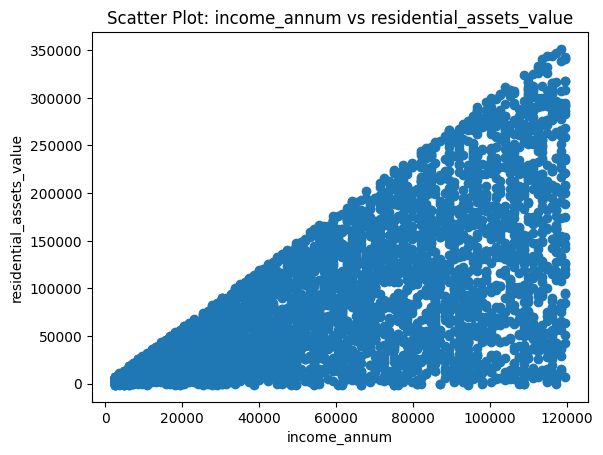

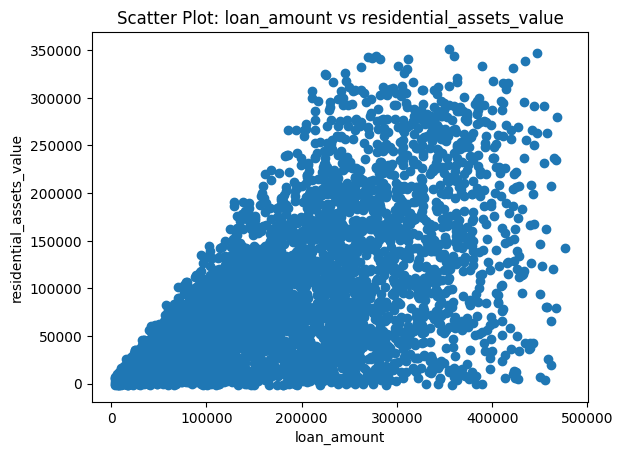

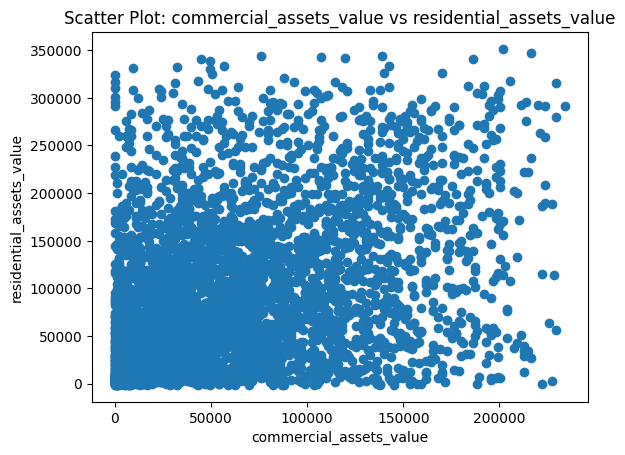

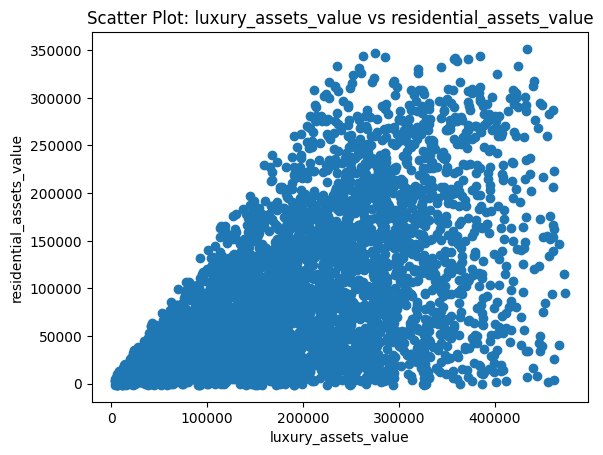

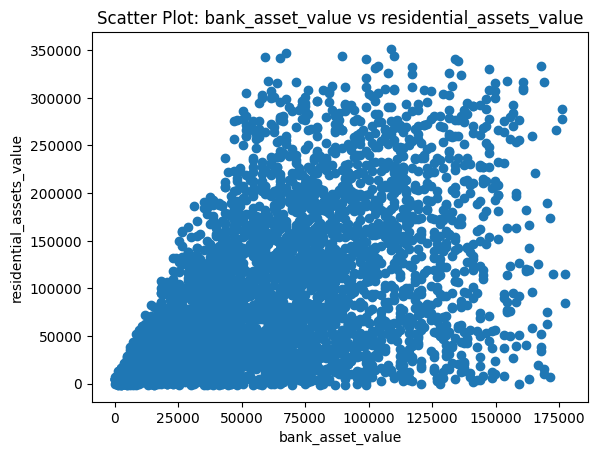

In [58]:
for column in support_columns:
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.title(f'Scatter Plot: {column} vs {target_column}')
    plt.show()

## KNN

### How can we make Dummy variables?

In [15]:
data = pd.get_dummies(data, columns=['education','self_employed','loan_status'], dtype=int, drop_first=True)

In [16]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
loan_id,,,,,,,,,,,,
1,2,115939.2,361102.3,12,778,28984.8,212555.2,274147.9,96616.0,0,0,0
2,0,49515.7,147339.4,8,417,32607.9,26569.4,106277.6,39854.1,1,1,1
3,3,109900.7,358686.9,20,506,85746.7,54346.5,402164.1,154585.6,0,0,1
4,3,99031.4,370763.9,8,467,219801.4,39854.1,281394.1,95408.3,0,0,1
5,5,118354.6,292263.4,20,382,149754.8,99031.4,355063.8,60385.0,1,1,1


* We should change the new name of our predicted variable, so it does not have spaces

In [17]:
data.rename(columns = {'loan_status_ Rejected':'rejected_loan'}, inplace = True)

* Now, we have a column for not graduated, self employed, and rejected loans. If they are not graduated or they are self employed or the loan is rejected, they will have 1.

### How do we Split the Data?

In [18]:
X = data.loc[:, data.columns != "rejected_loan"]
y = data['rejected_loan']

X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
loan_id,,,,,,,,,,,
1,2,115939.2,361102.3,12,778,28984.8,212555.2,274147.9,96616.0,0,0
2,0,49515.7,147339.4,8,417,32607.9,26569.4,106277.6,39854.1,1,1
3,3,109900.7,358686.9,20,506,85746.7,54346.5,402164.1,154585.6,0,0
4,3,99031.4,370763.9,8,467,219801.4,39854.1,281394.1,95408.3,0,0
5,5,118354.6,292263.4,20,382,149754.8,99031.4,355063.8,60385.0,1,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=3)

#### How can we Scale data so extreme data points do not have an overimpact?

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### How do we Fit our Model?

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Now, it's time to predict!!!

In [23]:
y_pred = knn.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy}"

'Accuracy: 0.8864168618266979'

#### Can we find a better Accuracy Score?

* We set a range of K-values to test

In [25]:
k_values = [i for i in range (1,30)]

* We create a empty list to fill it with the scores that we will receive

In [26]:
scores = []

* We fit all the X data

In [27]:
X = scaler.fit_transform(X)

* Then, we evaluate all the 30 K values

In [28]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

* Finally, we can visually all the results

Text(0, 0.5, 'Accuracy Score')

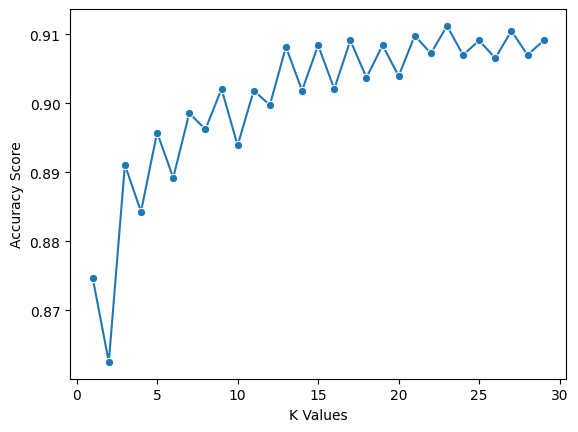

In [29]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

* Now, we train our model using the best k value.

In [30]:
best_index = np.argmax(scores)

In [31]:
best_k = k_values[best_index]
print(best_k)

23


In [32]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [33]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [34]:
f"Accuracy: {accuracy}"

'Accuracy: 0.9098360655737705'